In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as scp
from scipy.optimize import curve_fit 

Изучение работы оптического пирометра(стоим график из лабника, чтобы перевести яркостую температуру в обычную):

1.059595527801534 -16.028878909575162


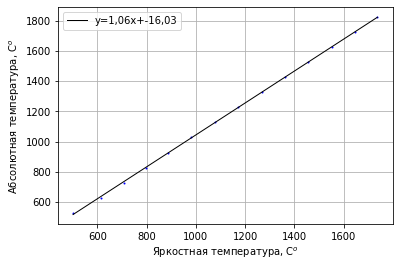

In [3]:
fig = plt.figure()
T_yar = [775,890,980,1070,1160,1255,1350,1445,1540,1635,1730,1825,1920,2010]
T = [800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100]

for i in range (len(T_yar)):# перевод в цельсии
    T_yar[i]-=273
    
for i in range (len(T)):# перевод в цельсии
    T[i]-=273


def mapping(x, a, b): 
    return a * x + b #задание целевой функции, которой мы апроксимируем

args, _ = curve_fit(mapping, T_yar, T) #нашли аргументы целевой функции
a, b = args[0], args[1]
T_fit = [i for i in range(len(T_yar))]
for i in range (len(T)):
    T_fit[i] = a*T_yar[i]+b

print (a,b)

plt.plot(T_yar, T, color = 'blue', marker ='o',linestyle='None', markersize = 1)
plt.plot(T_yar, T_fit, color = 'black',linewidth = 1, label='y=1,06x+-16,03')

plt.xlabel("Яркостная температура, С$^{o}$")
plt.ylabel("Абсолютная температура, С$^{o}$")
#plt.axis([0.5, 5, -1, 7])
plt.legend() #легенда
plt.grid(True) 
plt.show()
fig.savefig('T(T_yar).png', dpi = 1000)


Начальные данные:

In [14]:
I = [473,522,578,621,685,772,822,899,934,1013] #mA
U = [1.658,2.087,2.595,3.018,3.681,4.666,5.264,5.243,6.73,7.828] #Volt
Tbr = [ 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900] #Celsius - яркостная температура

In [15]:
Tth = [1044,1150,1255,1361,1467,1573,1679,1785,1891,1997] #Celsius - термодинамическая температура
W = [] #W - мощность
for i in range(len(I)):
    W.append(round(I[i]*U[i], 2))
print('Мощность лампы в мВт', W) #мощность такая охуительно большая, потому что на 
                                #моей установке была лампа с 7-8 параллельными нитями

Мощность лампы в мВт [784.23, 1089.41, 1499.91, 1874.18, 2521.49, 3602.15, 4327.01, 4713.46, 6285.82, 7929.76]


Строим график W = f2(T)

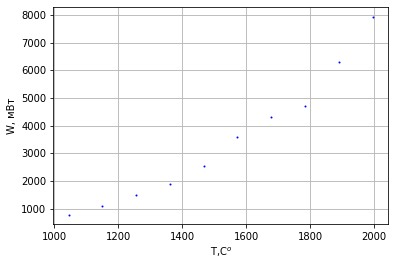

In [16]:
fig = plt.figure()
plt.plot(Tth, W, color = 'blue', marker ='o',linestyle='None', markersize = 1)
plt.xlabel("T,С$^{o}$")
plt.ylabel("W, мВт")
#plt.axis([0.5, 5, -1, 7])

plt.grid(True) 
plt.show()
fig.savefig('W(T).png', dpi = 1000)

Построим график $\ln(W) = \ln(\epsilon_T \sigma S) + n \ln(T)$ в логарифмическом масштабе

[  3.53707929 -17.93286967] 0.002


<Figure size 432x288 with 0 Axes>

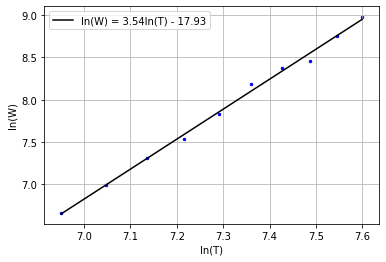

In [18]:
fig = plt.figure()
lnW, lnTth = [], []
for i in range(len(W)):
    lnW.append(np.log(W[i]))
    lnTth.append(np.log(Tth[i]))

z = np.polyfit(lnTth, lnW, 1)
f = np.poly1d(z)
residual = np.std(lnW - np.polyval(np.polyfit(lnTth, lnW, 1),lnTth))**2
print(f.c, round(residual, 3))
lnTth_new = np.linspace(lnTth[0], lnTth[-1], 50)
lnW_new = f(lnTth_new)

fig, ax = plt.subplots()
plt.scatter(lnTth, lnW, s = 6, c = 'blue')
plt.plot(lnTth_new, lnW_new, c = 'black', label = 'ln(W) = 3.54ln(T) - 17.93')

plt.grid(True)
ax.grid(which='major', linewidth = 0.75)
ax.grid(which='minor', linewidth = 0.5)
ax.set_xlabel('ln(T)')
ax.set_ylabel('ln(W)')
ax.legend()
plt.show()
fig.savefig('lnW(lnT).png', dpi = 1000)

Построим калибровочный график для $\epsilon_T$

[ 0.00015209 -0.05107692]
E_t(T=1679) =  0.1881573626373628


<Figure size 432x288 with 0 Axes>

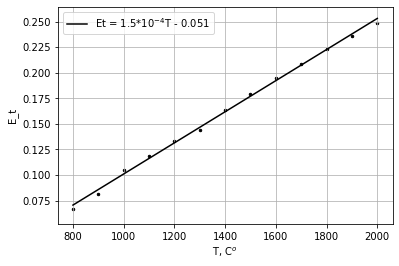

In [21]:
fig = plt.figure()
T = [800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000]
Et = [0.067, 0.081, 0.105, 0.119, 0.133, 0.144, 0.164, 0.179, 0.195, 0.209, 0.223, 0.236, 0.249]

z = np.polyfit(T, Et, 1)
f = np.poly1d(z)
T_new = np.linspace(T[0], T[-1], 50)
Et_new = f(T_new)

print (f.c)

fig, ax = plt.subplots()
plt.scatter(T, Et, s = 6, c = 'black')
plt.plot(T_new, Et_new, c = 'black', label = 'Et = 1.5*10$^{-4}$T - 0.051')
#plt.scatter(1679, f(1679), s = 13, c = 'blue', label = 'T = 1679')
print('E_t(T=1679) = ', f(1573
))

plt.grid(True)
ax.grid(which='major', linewidth = 0.75)
ax.grid(which='minor', linewidth = 0.5)
ax.set_xlabel('T, C$^{o}$')
ax.set_ylabel('E_t')
ax.legend()
plt.show()
fig.savefig('Et(T).png', dpi = 1000)

Посчитаем постоянные Стефана-Больцмана и Планка

In [30]:
#определяем сигу двумя способами для точки Т=1679 тк она лучше всего лежит на графике
sigma1 = W[2] *10**(-3)/ (0.5*f(T[2])*T[2]**4)
sigma2 = np.exp(-14.2298) * 10**(-6) / (0.5 * 0.122)
print(sigma1 , sigma2)

h = np.cbrt(2*(np.pi**5)*((1.38*10**(-16))**4) / (15*((3*10**10)**2)*sigma2))
print(h)

4.966241840731063e-10 1.083294520476274e-11
1.149225171932206e-24
